In [76]:
import torch
import torch.nn as nn
from torch import optim
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

## Using Linear Model

In [77]:
model = nn.Linear(in_features = 1, out_features = 1)

that instatiates weights accordingly to in_features and out_features

In [78]:
# parameters
model.weight, model.bias

(Parameter containing:
 tensor([[0.9519]], requires_grad=True),
 Parameter containing:
 tensor([-0.6763], requires_grad=True))

# PyTorch Regression

## Data

In [79]:
X = torch.randn(100,1)*10
y = X + torch.randn(100,1)*2.5

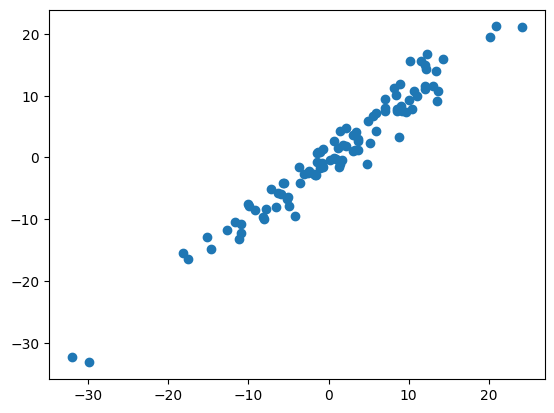

In [80]:
plt.scatter(X,y)

We took just 1 input feature of X

In [81]:
X[0]

tensor([20.1786])

We could achieve that as well by $$x * weight + bias$$ since it's just linear model with single layer

In [82]:
X[0]*model.weight + model.bias

tensor([[18.5309]], grad_fn=<AddBackward0>)

## Linear Regression Model



### Forward Pass

To use more layers we should use sequential function

In [83]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size): # in init method we define the architecture of entire network
    super().__init__() # we need super function to initialize built in class nn.Module
    self.layer_1 = nn.Linear(input_size, output_size) # Instance of nn.Linear with input_size and output_size. As we can see we use only 1 layer in the whole model

  def forward(self, x):
    return self.layer_1(x) # returns the output of single linear layer


In [84]:
# instantiate
lr = LinearRegression(5, 1) # we take 5 input_features and 1 output_feature

In [85]:
list(lr.parameters())

[Parameter containing:
 tensor([[-0.1844,  0.3769, -0.2479, -0.1331, -0.1843]], requires_grad=True),
 Parameter containing:
 tensor([0.3533], requires_grad=True)]

As we can see we have 5 weights for input features and 1 bias

In [86]:
# create an input
x = torch.tensor([1.,2.,3.,4.,5.]) # we need decimal numbers
x

tensor([1., 2., 3., 4., 5.])

In [87]:
# pass data through network
lr.forward(x)

tensor([-1.2753], grad_fn=<AddBackward0>)

And here is the prediction, however for now it contains no training since we used only froward pass on random weights.

In [88]:
# create a new model
lr2 = LinearRegression(1, 1)
lr2

LinearRegression(
  (layer_1): Linear(in_features=1, out_features=1, bias=True)
)

### Loss

In [89]:
# mse loss is a criterion
criterion = nn.MSELoss()

### Optimizer

In [90]:
optimizer = optim.SGD(lr2.parameters(), lr = .01) # we need to pass parameters and learning rate
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Training Loop

In [91]:
epochs = 200
losses = []

for epoch in range(1, epochs + 1):
  # weighted sum
  yhat = lr2.forward(X)

  # compute the loss
  loss = criterion(yhat, y)
  losses.append(loss)
  if epoch%10 == 0:
    print(f'Epoch {epoch}, Loss {loss}')

  # zero out the gradient (we need to do it before the backward to not to acummulate gradients)
  optimizer.zero_grad()

  # backpropagate the loss
  loss.backward()

  # take gradient descent step
  optimizer.step()

Epoch 10, Loss 4.810103416442871
Epoch 20, Loss 4.640031814575195
Epoch 30, Loss 4.533871173858643
Epoch 40, Loss 4.46340799331665
Epoch 50, Loss 4.4162092208862305
Epoch 60, Loss 4.384551525115967
Epoch 70, Loss 4.363313674926758
Epoch 80, Loss 4.349066257476807
Epoch 90, Loss 4.339507579803467
Epoch 100, Loss 4.333095073699951
Epoch 110, Loss 4.328793525695801
Epoch 120, Loss 4.3259077072143555
Epoch 130, Loss 4.323970794677734
Epoch 140, Loss 4.322671890258789
Epoch 150, Loss 4.321800708770752
Epoch 160, Loss 4.321216583251953
Epoch 170, Loss 4.320823669433594
Epoch 180, Loss 4.320560932159424
Epoch 190, Loss 4.3203840255737305
Epoch 200, Loss 4.320266246795654


### Viz

In [92]:
losses[0].detach().numpy()

array(5.126358, dtype=float32)

In [93]:
losses[0]

tensor(5.1264, grad_fn=<MseLossBackward0>)

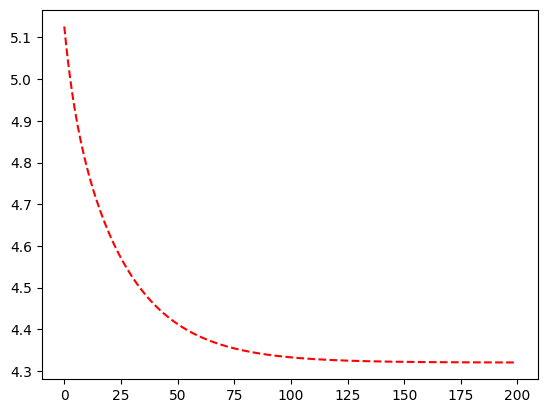

In [94]:
plt.plot(range(epochs), [i.detach().numpy() for i in losses], '--r')

In [95]:
# extract params
w, b = lr2.parameters()
w, b

(Parameter containing:
 tensor([[0.9932]], requires_grad=True),
 Parameter containing:
 tensor([-0.1246], requires_grad=True))

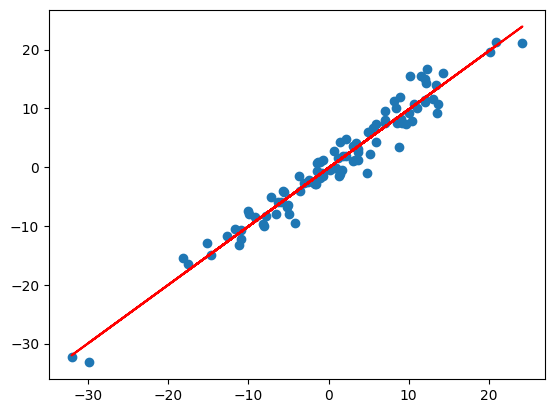

In [96]:
plt.scatter(X, y)
plt.plot(X, w.detach() * X + b.detach(), '-r')

# PyTorch Classification

## Data

For classification problem we can use exactly same model.

In [97]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [100]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

We've scaled our features

In [101]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Classification Model

Here are our classes. The only difference from regression is that in classification we have differenct input and output values. Model itself can look exactly the same.

### Forward Pass

In [102]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(30, 40)
    self.layer_2 = nn.Linear(40, 10)
    self.layer_3 = nn.Linear(10, 1) # here is the difference

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid() # we need sigmoid activation due to classification issue and expected binary output

  def forward(self, X):
    x = self.layer_1(X)
    x = self.relu(x)
    x = self.layer_2(x)
    x = self.relu(x)
    x = self.layer_3(x)
    x = self.sigmoid(x)
    return x

In [103]:
# instantiate it
model = Classifier()

In [104]:
# make tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape(-1,1)).float()

### Loss

In [105]:
loss_fn = nn.BCELoss()

### Optimizer

In [106]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

### Training Loop

In [107]:
# function for training
losses = []

def train_loop(n_epochs, optimizer, model, loss_function, x_train, y_train):
  for epoch in range(1, n_epochs + 1):
    yhat = model(x_train)
    loss = loss_function(yhat, y_train)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [108]:
# call the training function
train_loop(5000, optimizer, model, loss_fn, X, y)

Epoch 100, Loss 0.6183024644851685
Epoch 200, Loss 0.515556275844574
Epoch 300, Loss 0.37075963616371155
Epoch 400, Loss 0.2462184727191925
Epoch 500, Loss 0.1765415072441101
Epoch 600, Loss 0.13856768608093262
Epoch 700, Loss 0.11598832905292511
Epoch 800, Loss 0.10124501585960388
Epoch 900, Loss 0.09095477312803268
Epoch 1000, Loss 0.08346101641654968
Epoch 1100, Loss 0.07776065170764923
Epoch 1200, Loss 0.07328902930021286
Epoch 1300, Loss 0.06967529654502869
Epoch 1400, Loss 0.06671138852834702
Epoch 1500, Loss 0.06423056870698929
Epoch 1600, Loss 0.0620884969830513
Epoch 1700, Loss 0.060190599411726
Epoch 1800, Loss 0.05846528336405754
Epoch 1900, Loss 0.05691014230251312
Epoch 2000, Loss 0.05549928918480873
Epoch 2100, Loss 0.05421019718050957
Epoch 2200, Loss 0.053023211658000946
Epoch 2300, Loss 0.0519157238304615
Epoch 2400, Loss 0.0509028322994709
Epoch 2500, Loss 0.04997465759515762
Epoch 2600, Loss 0.04911099746823311
Epoch 2700, Loss 0.048293136060237885
Epoch 2800, Loss 0

### Predictions

In [112]:
preds = np.where(model(X) > 0.5, 1, 0)
preds[:20]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [114]:
from sklearn.metrics import confusion_matrix as cm, accuracy_score as acc

cm(preds, y)

array([[208,   1],
       [  4, 356]])

In [121]:
print(f'Accuracy score: {round(acc(y, preds),4)*100}%')

Accuracy score: 99.11999999999999%


# Using sklearn dataset

In [123]:
class MyData(Dataset):
  # loads data into class
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  # determines how many data samples exist
  def __len__(self):
    return len(self.Y)

  # returns the sample based on index
  def __getitem__(self, index):
    X = self.X[index].float().reshape(-1)
    Y = self.Y[index].long()
    return X, Y

In [125]:
from sklearn.datasets import make_classification

X, y = make_classification()

In [126]:
X

array([[-1.14109837,  2.8814134 , -1.74176903, ..., -0.51651893,
         1.91858981, -2.20623771],
       [-0.84066034, -1.30714496, -0.83858877, ...,  1.73561806,
        -0.44730088,  0.13792929],
       [-1.42815   ,  0.85634409,  0.90629438, ..., -1.42094087,
        -1.46348238, -2.20388598],
       ...,
       [-1.03990184, -0.91113504, -1.15804975, ...,  0.51220004,
        -0.58583057, -1.05743326],
       [-0.86810602, -0.7595491 , -1.35921384, ...,  0.5085132 ,
         0.49971187, -1.3437611 ],
       [-0.21488718,  0.40009217, -1.79670098, ...,  0.50267122,
         1.67158409, -0.01875377]])

In [127]:
y

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [128]:
X = torch.tensor(X)
y = torch.tensor(y)

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([75, 20]),
 torch.Size([25, 20]),
 torch.Size([75]),
 torch.Size([25]))

In [134]:
train_data = MyData(X_train, y_train)

In [135]:
train_loader = DataLoader(train_data,
                          32)

In [138]:
# examine first observation
train_data.__getitem__(0)

(tensor([-3.0419,  0.3585, -0.6351,  0.3717, -1.8400, -0.3826, -0.6778, -1.3416,
         -0.6221, -0.7658, -0.0613, -1.7476, -1.8399,  0.5722, -0.0826,  1.1027,
          1.5176,  0.2119, -0.4117,  0.3135]),
 tensor(1))

# Using torchvision dataset

In [148]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [145]:
train_data = datasets.FashionMNIST(root = 'data', download = True, transform = ToTensor())

In [146]:
test_data = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = ToTensor())

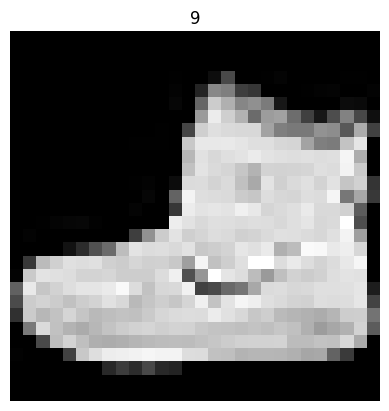

In [153]:
img, label = train_data[0]

plt.imshow(img[0].squeeze(), cmap = 'gray')
plt.title(label)
plt.axis(False)
plt.show()

In [154]:
train_dataloader = DataLoader(train_data, batch_size = 20, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 20, shuffle = False)

In [155]:
train_ims, train_labels = next(iter(train_dataloader))

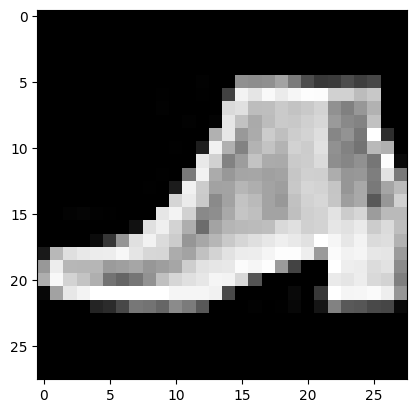

In [157]:
plt.imshow(train_ims[0].squeeze(), cmap = 'gray')

In [158]:
len(train_ims)

20

#